In [1]:
import baostock as bs
import pandas as pd

/home/zhuf/.pyenv/versions/data_sci_env_py3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/zhuf/.pyenv/versions/data_sci_env_py3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
lg = bs.login()

login success!


In [3]:
fields = ['日期', '开盘价(元)', '最高价(元)', '最低价(元)', '收盘价(元)', '昨日收盘价(元)', '涨跌幅(%)', '成交量(股)', '成交金额(元)']
index = {'sh.000986': '全指能源',
         'sh.000987': '全指材料',
         'sh.000988': '全指工业',
         'sh.000989': '全指可选',
         'sh.000990': '全指消费',
         'sh.000991': '全指医药',
         'sh.000992': '全指金融',
         'sh.000993': '全指信息',
         'sh.000994': '全指电信',
         'sh.000995': '全指公用',
        }

In [4]:
for code in index:
    rs = bs.query_history_k_data_plus(code,
        "date,open,high,low,close, preclose, pctChg, volume,amount",
         start_date='2019-09-01', end_date='2020-04-16')

    data_list = []

    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns= fields)
    
    print(index[code])
    print(result)

全指能源
             日期     开盘价(元)     最高价(元)     最低价(元)     收盘价(元)   昨日收盘价(元)  \
0    2019-09-02  1542.7930  1578.1730  1541.9290  1574.1260  1538.8020   
1    2019-09-03  1574.6260  1576.8040  1566.2830  1572.8280  1574.1260   
2    2019-09-04  1572.7210  1592.2470  1570.7070  1592.2470  1572.8280   
3    2019-09-05  1597.3960  1615.6920  1597.2710  1598.4460  1592.2470   
4    2019-09-06  1601.8750  1606.2660  1594.7220  1601.9710  1598.4460   
..          ...        ...        ...        ...        ...        ...   
145  2020-04-10  1329.2582  1330.5836  1312.1962  1315.4123  1332.7908   
146  2020-04-13  1317.7051  1320.4706  1311.6839  1312.9302  1315.4123   
147  2020-04-14  1315.0198  1330.9962  1312.4389  1330.9442  1312.9302   
148  2020-04-15  1327.6640  1327.6640  1317.4523  1318.9551  1330.9442   
149  2020-04-16  1313.2896  1319.3314  1312.0537  1314.6879  1318.9551   

        涨跌幅(%)      成交量(股)          成交金额(元)  
0     2.295600  1112044608  6553379328.0000  
1    -0.082500

In [5]:
rs = bs.query_history_k_data_plus('sz.h30202',
        "date,open,high,low,close, preclose, pctChg, volume,amount",
         start_date='2019-09-01', end_date='2020-04-16')

data_list = []

while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns= fields)

print(result)

Empty DataFrame
Columns: [日期, 开盘价(元), 最高价(元), 最低价(元), 收盘价(元), 昨日收盘价(元), 涨跌幅(%), 成交量(股), 成交金额(元)]
Index: []


In [6]:
from jqdatasdk import *
auth('15201358389','358389') 

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [7]:
get_all_securities(types=['index'], date=None)

,display_name,name,start_date,end_date,type
000001.XSHG,上证指数,SZZS,1991-07-15,2200-01-01,index
000002.XSHG,A股指数,AGZS,1992-02-21,2200-01-01,index
000003.XSHG,B股指数,BGZS,1992-02-21,2200-01-01,index
000004.XSHG,工业指数,GYZS,1993-05-03,2200-01-01,index
000005.XSHG,商业指数,SYZS,1993-05-03,2200-01-01,index
...,...,...,...,...,...
399994.XSHE,中证信息安全主题指数,XXAQ,2015-03-12,2200-01-01,index
399995.XSHE,中证基建工程指数,JJGC,2015-03-12,2200-01-01,index
399996.XSHE,中证智能家居指数,ZNJJ,2014-09-17,2200-01-01,index
399997.XSHE,中证白酒指数,ZZBJ,2015-01-21,2200-01-01,index


In [8]:
get_query_count()

{'total': 1000000, 'spare': 999312}

In [9]:
industries = get_industries('sw_l1')

In [10]:
len(industries)

34

In [11]:
industries = get_industries('sw_l1', '2020-04-01')

In [12]:
len(industries)

28

In [13]:
industries

,name,start_date
801740,国防军工I,2014-02-21
801020,采掘I,2004-02-10
801110,家用电器I,2004-02-10
801160,公用事业I,2004-02-10
801770,通信I,2014-02-21
801010,农林牧渔I,2004-02-09
801120,食品饮料I,2004-02-10
801750,计算机I,2014-02-21
801050,有色金属I,2004-02-10
801890,机械设备I,2014-02-21


In [14]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']

In [15]:
data = {}

for code, name in zip(industries.index, industries['name']):
    #print(code, name[:-1])
    df=finance.run_query(query(finance.SW1_DAILY_PRICE).filter(finance.SW1_DAILY_PRICE.code==code).order_by(finance.SW1_DAILY_PRICE.date.desc()).limit(365))
    #df.to_csv(name[:-1] + '.csv')
    data[name[:-1]] = df['close'].values
    #df.plot('date','close', title=name[:-1] )
    #break

In [16]:
dfs = pd.DataFrame(data, index = df['date'].values)

In [17]:
data['date'] = df['date'].values

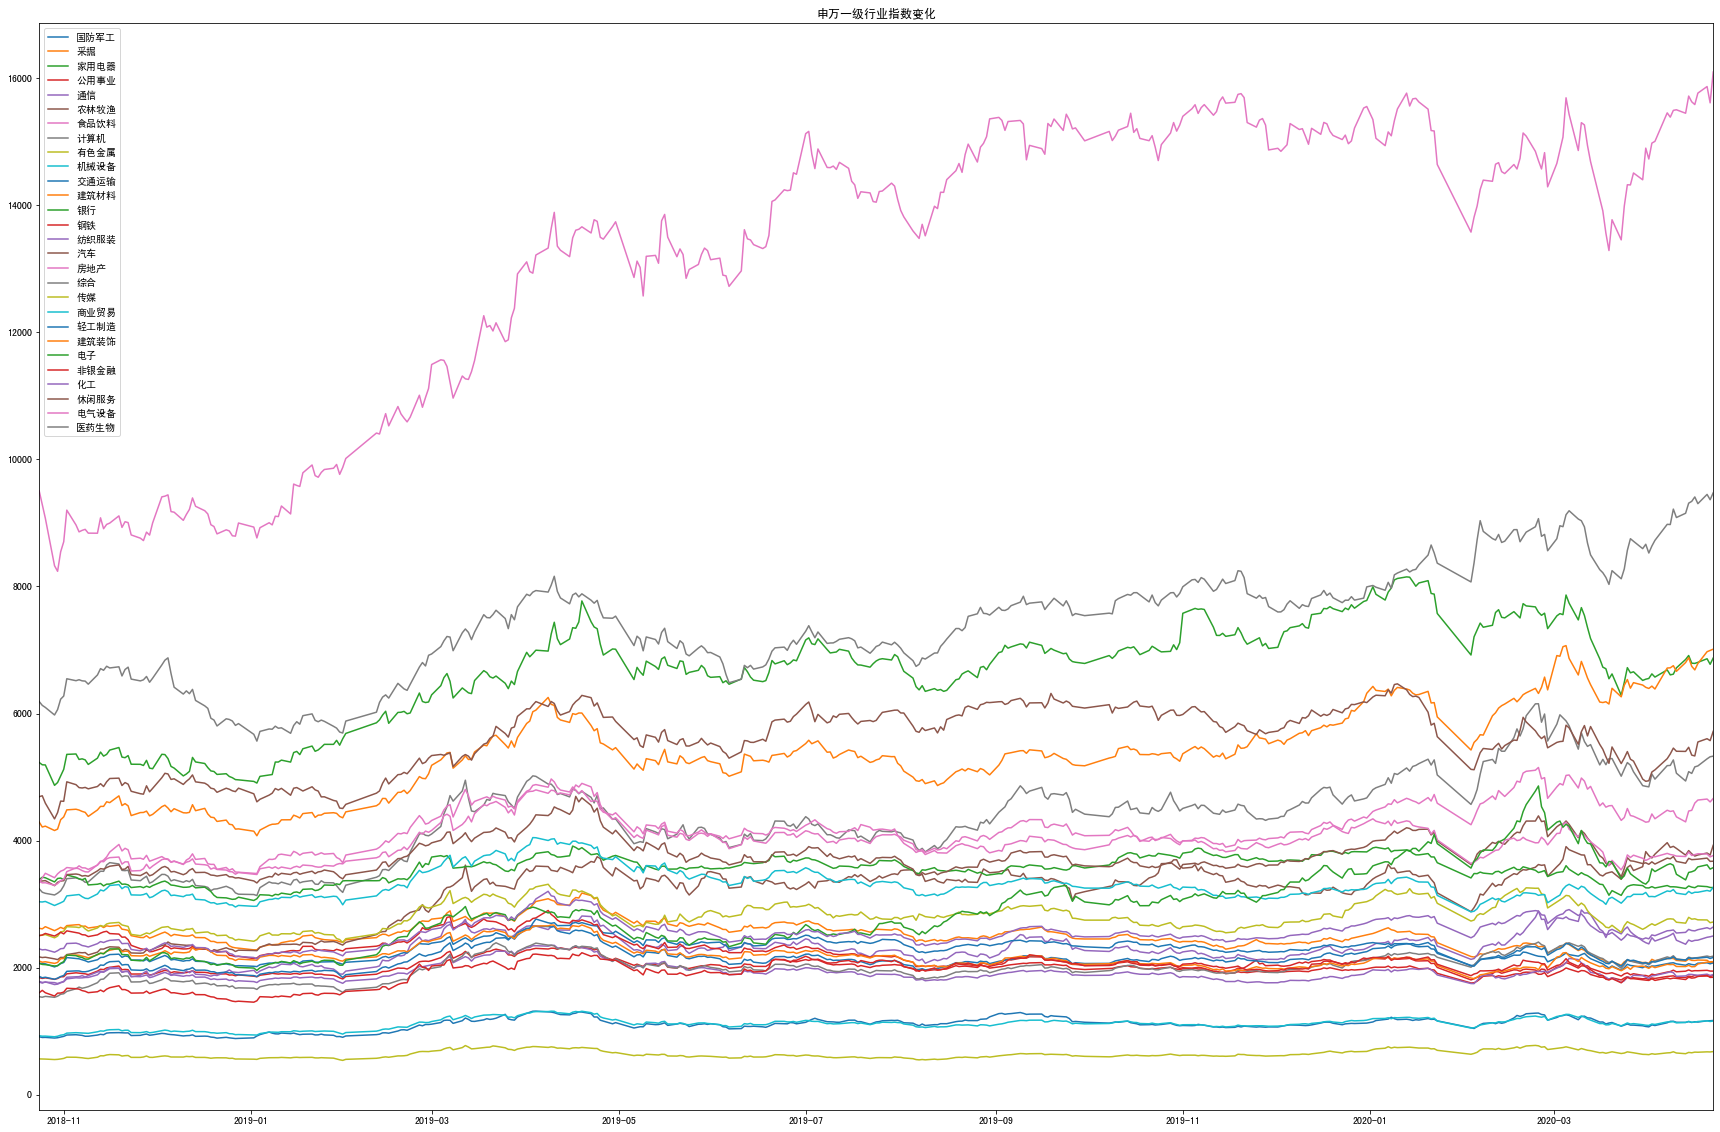

In [18]:
dfs.plot(title='申万一级行业指数变化', figsize=(30,20))

In [19]:
dfs

,国防军工,采掘,家用电器,公用事业,通信,农林牧渔,食品饮料,计算机,有色金属,机械设备,...,传媒,商业贸易,轻工制造,建筑装饰,电子,非银金融,化工,休闲服务,电气设备,医药生物
2020-04-22,1167.39,2075.77,6872.70,1874.17,2498.13,3925.45,16098.32,5328.70,2718.15,1159.62,...,677.94,3262.47,2159.07,2093.14,3573.07,1846.88,2638.90,5719.22,4662.43,9474.26
2020-04-21,1163.50,2079.01,6774.89,1859.98,2485.41,3771.67,15612.88,5319.04,2706.64,1151.71,...,672.11,3202.44,2143.88,2092.24,3550.61,1845.63,2608.66,5573.18,4607.79,9365.59
2020-04-20,1162.18,2115.47,6861.87,1868.59,2477.03,3803.59,15869.78,5286.00,2750.15,1162.13,...,673.73,3214.36,2162.84,2085.89,3617.68,1875.69,2627.68,5603.27,4653.18,9448.86
2020-04-17,1142.44,2118.80,6805.18,1867.27,2431.72,3772.79,15766.21,5174.62,2751.96,1151.52,...,667.58,3185.91,2149.26,2056.56,3585.46,1860.76,2596.72,5551.73,4637.50,9303.15
2020-04-16,1147.58,2112.02,6788.57,1875.63,2428.59,3755.57,15585.94,5159.83,2768.12,1140.73,...,669.35,3186.25,2149.42,2015.64,3528.60,1840.39,2578.19,5331.81,4589.60,9409.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-30,895.86,2605.01,4913.39,1828.11,1749.39,2125.83,8238.36,3171.04,2494.99,919.70,...,555.54,2999.08,1834.72,2081.27,2029.14,1598.10,2266.22,4440.49,3322.33,6062.00
2018-10-29,891.08,2581.94,4869.14,1815.52,1763.34,2137.44,8326.17,3143.14,2468.98,911.36,...,552.59,2977.58,1815.85,2066.05,2025.51,1552.33,2242.31,4340.80,3294.48,5976.88
2018-10-26,901.43,2644.26,5190.18,1838.83,1770.73,2163.15,9073.76,3169.53,2520.48,921.15,...,559.73,3041.30,1848.42,2091.49,2046.47,1604.29,2283.81,4588.76,3335.82,6095.57
2018-10-25,899.92,2609.81,5192.63,1829.88,1766.59,2158.40,9288.14,3186.50,2509.11,920.49,...,561.09,3032.76,1840.39,2084.82,2049.84,1641.58,2279.18,4705.04,3333.93,6128.14


In [20]:
import bokeh
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

In [21]:
output_notebook(load_timeout=5000000)

Loading BokehJS ...

In [22]:
source = ColumnDataSource(data=data)

In [23]:
p = figure()

In [24]:
p.line(x = 'date', y='食品饮料', source=source)

GlyphRenderer(id='1038', ...)

In [25]:
show(p)

In [26]:
output_notebook?

Signature:
output_notebook(
    resources=None,
    verbose=False,
    hide_banner=False,
    load_timeout=5000,
    notebook_type='jupyter',
)
Docstring:
Configure the default output state to generate output in notebook cells
when :func:`show` is called. Note that, :func:`show` may be called multiple
times in a single cell to display multiple objects in the output cell. The
objects will be displayed in order.

Args:
    resources (Resource, optional) :
        How and where to load BokehJS from (default: CDN)

    verbose (bool, optional) :
        whether to display detailed BokehJS banner (default: False)

    hide_banner (bool, optional):
        whether to hide the Bokeh banner (default: False)

    load_timeout (int, optional) :
        Timeout in milliseconds when plots assume load timed out (default: 5000)

    notebook_type (string, optional):
        Notebook type (default: jupyter)

Returns:
    None

.. note::
    Generally, this should be called at the beginning of an inte

In [27]:
show(p)

In [1]:
d = {'a':1, 'b':3}

In [3]:
for key ,value in d.items():
    print(key, value)

a 1
b 3
